In [84]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
from tensorflow import keras
from keras.datasets import boston_housing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [85]:
(X, Y), (x_test, y_test) = boston_housing.load_data()

In [3]:
print("shape of X: ",X.shape)
print("shape of Y: ",Y.shape)

print("shape of x_test:",x_test.shape)
print("shape of y_test:",y_test.shape)

shape of X:  (404, 13)
shape of Y:  (404,)
shape of x_test: (102, 13)
shape of y_test: (102,)


In [4]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79


In [5]:
pd.DataFrame(Y)

,0
0,15.2
1,42.3
2,50.0
3,21.1
4,17.7
...,...
399,19.4
400,25.2
401,19.4
402,19.4


In [76]:
x_CV, x_train , y_CV , y_train = train_test_split(X, Y, train_size=0.25, random_state=1) 

In [77]:
print("shape of x_train: ",x_train.shape)
print("shape of y_train: ",y_train.shape)

print("shape of x_CV:",x_CV.shape) ## cross validation for choosing the best model
print("shape of y_CV:",y_CV.shape)

shape of x_train:  (303, 13)
shape of y_train:  (303,)
shape of x_CV: (101, 13)
shape of y_CV: (101,)


In [78]:
# Initialize Some Lists for Training errors ,CV errors , Models and Scalers
Train_Mean_Sqaure_Error = []                
CV_Mean_Sqaure_Error = []        
models = []               
scalers = []      # this list for saving the Z-Score Normalization for Each Model

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
# we will try 10 different polynomial models starting with degree=1 , ending with degree=10 , to choose the best model.
# we will choose the best model depending on the model which will give the least Cross Validation Error. 

for degree in range(1,11):
    
    # Add polynomial features to the training set
    polynomial = PolynomialFeatures(degree, include_bias=False)
    X_train_polynomial = polynomial.fit_transform(x_train)
    
    # Applying Z- Score Normalization
    scaler_polynomial = StandardScaler()  
    X_train_polynomial_scaled = scaler_polynomial.fit_transform(X_train_polynomial)
    scalers.append(scaler_polynomial) # saving scaler to use is for applying Z-Score Normalization on test data later
    
    # Create and train the model
    model = LinearRegression()              
    model.fit(X_train_polynomial_scaled, y_train )
    models.append(model) # Saving model, to use it for testing later
    
    # Compute the training Mean Sqaure Error
    yhat = model.predict(X_train_polynomial_scaled)
    training_error = mean_squared_error(y_train,yhat) / 2
    Train_Mean_Sqaure_Error.append(training_error)
    
    # Add polynomial features and scale the cross validation data set
    polynomial = PolynomialFeatures(degree, include_bias=False)
    X_cv_polynomial = polynomial.fit_transform(x_CV) ## x_test؟؟
    X_cv_polynomial_scaled = scaler_polynomial.transform(X_cv_polynomial)
    
    # Compute the cross validation MSE
    yhat = model.predict(X_cv_polynomial_scaled)
    cross_validation_error = mean_squared_error(y_CV, yhat) / 2
    CV_Mean_Sqaure_Error.append(cross_validation_error)

In [79]:
print("Mean Square Error of Training Data Set: ",Train_Mean_Sqaure_Error)
print()
print("Mean Square Error of Cross Validation Data Set: ",CV_Mean_Sqaure_Error)

Mean Square Error of Training Data Set:  [10.828457417154716, 2.448273543591251, 7.898799690162331e-25, 7.885715130298572e-26, 1.0713940809797746e-25, 1.9286691695036924e-25, 1.5808310015598988e-24, 6.659945968889613e-25, 2.7471471036975898e-24, 6.087275835271437e-24]

Mean Square Error of Cross Validation Data Set:  [12.080071416116233, 8.867365808883525, 2902.9063327428166, 677.4995655241324, 315.4520569427517, 221.09969725069686, 201.70846086199975, 209.2742472193537, 233.378224946912, 272.15957980860475]


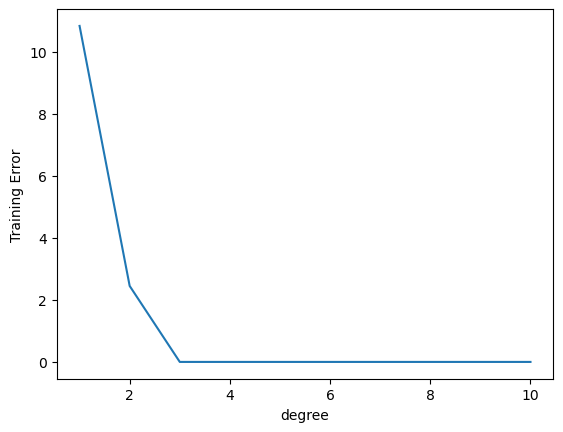

In [80]:
degrees=np.arange(10)+1
plt.xlabel("degree")
plt.ylabel("Training Error")
plt.plot(degrees,Train_Mean_Sqaure_Error)

In [81]:
Min_Index = np.argmin(CV_Mean_Sqaure_Error)
print("Minimum Value Of Cross Validation Error: ",np.min(CV_Mean_Sqaure_Error))
print("Index Of Minimum Value Of Cross Validation Error: ",Min_Index)      

Minimum Value Of Cross Validation Error:  8.867365808883525
Index Of Minimum Value Of Cross Validation Error:  1


In [82]:
polynomial = PolynomialFeatures(Min_Index+1, include_bias=False) 
X_test_polynomial = polynomial.fit_transform(x_test)  

# Apply Z-Score Normalization
X_test_polynomial_scaled = scalers[Min_Index].transform(X_test_polynomial)

# Compute the test MSE
yhat = models[Min_Index].predict(X_test_polynomial_scaled)
test_error = mean_squared_error(y_test, yhat) / 2

print(f"Training Error: {Train_Mean_Sqaure_Error[Min_Index]:.2f}")
print(f"Cross Validation Error: {CV_Mean_Sqaure_Error[Min_Index]:.2f}")
print(f"Test Error: {test_error:.2f}")

Training Error: 2.45
Cross Validation Error: 8.87
Test Error: 5.77


In [92]:
accuracy= r2_score(y_test,yhat)*100
print("accuracy:",accuracy)

accuracy: 86.13557736967185
